# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

import pandas as pd
import numpy as np
import seaborn as sns

# Create a new dataframe from your CSV

reviews = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [2]:
# Print out any information you need to understand your dataframe
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
reviews.shape

(23486, 11)

In [4]:
reviews.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [28]:
reviews.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title_ismissing',
       'Review Text_ismissing', 'Division Name_ismissing',
       'Department Name_ismissing', 'Class Name_ismissing', 'num_missing'],
      dtype='object')

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

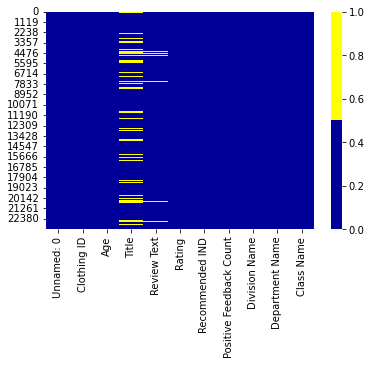

In [5]:
# Plot a heatmap of any missing data
cols = reviews.columns
colors = ['#000099', '#ffff00']
sns.heatmap(reviews[cols].isnull(), cmap=sns.color_palette(colors))

In [6]:
# Try out a missing data percentage list! 
for col in reviews.columns:
    pct_missing = np.mean(reviews[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

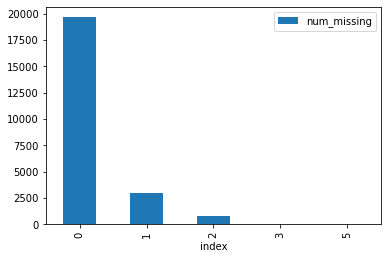

In [7]:
# Plot a missing data histogram
for col in reviews.columns:
    missing = reviews[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        reviews['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in reviews.columns if 'ismissing' in col]
reviews['num_missing'] = reviews[ismissing_cols].sum(axis=1)

reviews['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [8]:
# Handle any missing data in your dataframe.
reviews['Title'] = reviews['Title'].fillna('_MISSING_')

In [9]:
reviews['Review Text'] = reviews['Review Text'].fillna('_MISSING_')

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

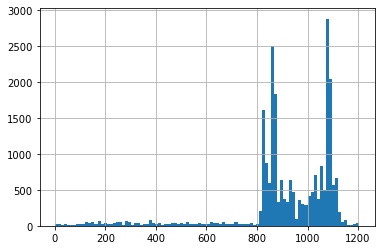

In [22]:
# Plot a histogram to see if there are any outliers.
reviews['Clothing ID'].hist(bins=100)

In [11]:
# Use the describe() method
reviews['Age'].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:>

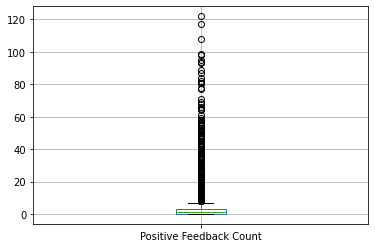

In [24]:
reviews.boxplot(column=['Positive Feedback Count'])

<AxesSubplot:>

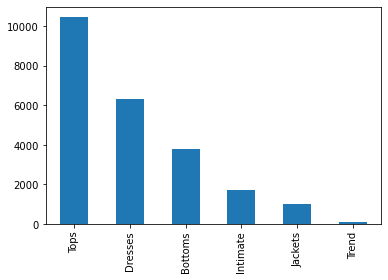

In [13]:
# Plot a bar chart
reviews['Department Name'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [19]:
# Handle any outliers in your dataframe
cols_to_drop = ['Positive Feedback Count']
reviews_les_positive_feed_count = reviews.drop(cols_to_drop, axis=1)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

Look for any irrelevant data in the dataframe. How will you handle it?

I think the Division Name column is repetitive and would delete it. It seems redundant since we have the same and better information from the Department Name column.

In [29]:
# Look for duplicates. How will you handle any duplicates?
reviews_dedupped = reviews.drop('Unnamed: 0', axis=1).drop_duplicates()

print(reviews.shape)

(23486, 17)


In [30]:
reviews_dedupped.shape

(23465, 16)

Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
Data that is missing reviews could be uninformative. I would remove those entries.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [33]:
# Try to convert all the strings in a column to lower or upper case. 
reviews['Class Name'].value_counts(dropna=False)

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
NaN                 14
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [34]:
reviews['Class Name Lower'] = reviews['Class Name'].str.lower()
reviews['Class Name Lower'].value_counts(dropna=False)

dresses           6319
knits             4843
blouses           3097
sweaters          1428
pants             1388
jeans             1147
fine gauge        1100
skirts             945
jackets            704
lounge             691
swim               350
outerwear          328
shorts             317
sleep              228
legwear            165
intimates          154
layering           146
trend              119
NaN                 14
casual bottoms       2
chemises             1
Name: Class Name Lower, dtype: int64